In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Ignore useless warnings
import warnings

warnings.filterwarnings('ignore')

from scripts.load_data import load_ufo_data
from scripts.clean_data import clean_columns, preprocess_datetime, standardize_values

df = load_ufo_data("../data/scrubbed.csv")
df = clean_columns(df)
df = preprocess_datetime(df)
df = standardize_values(df)

In [36]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.dropna(subset=["Date"])  # Drop rows where date conversion failed

In [37]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Weekday"] = df["Date"].dt.day_name()
df["Hour"] = pd.to_datetime(df["Time"], errors="coerce").dt.hour

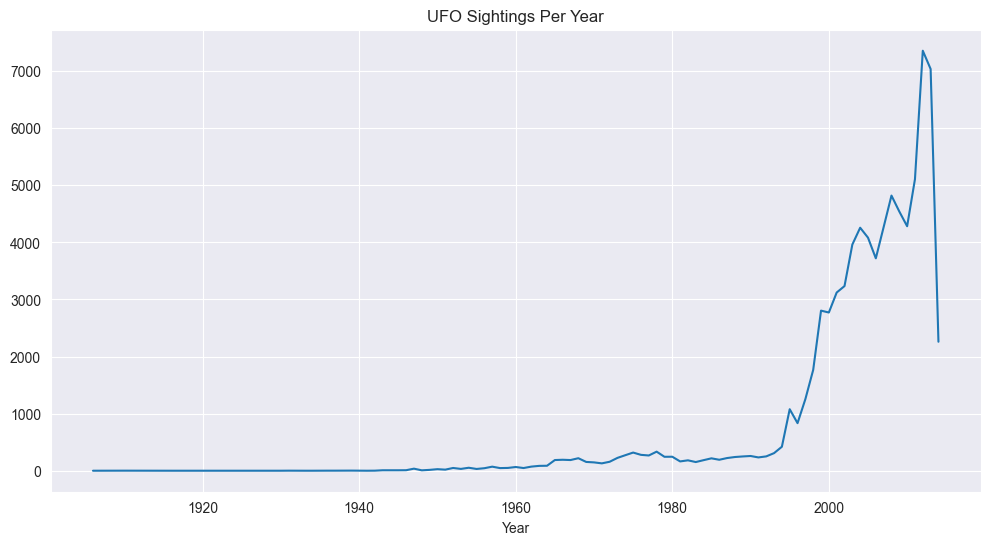

In [38]:
df["Year"].value_counts().sort_index().plot(kind="line", figsize=(12, 6), title="UFO Sightings Per Year")
plt.savefig("../images/sightings_yearly.png", dpi=300)

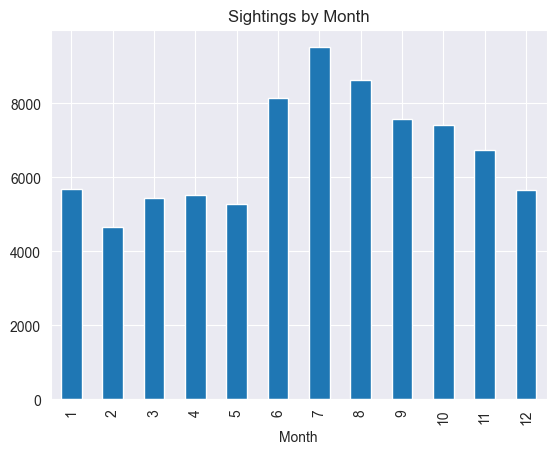

In [39]:
df["Month"].value_counts().sort_index().plot(kind="bar", title="Sightings by Month")
plt.savefig("../images/sightings_month.png", dpi=300)

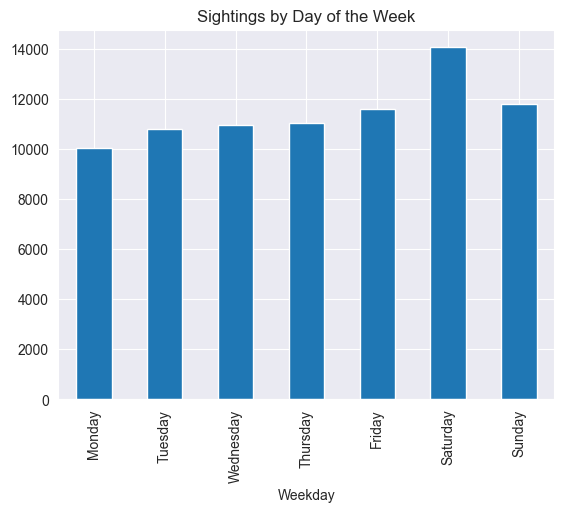

In [40]:
df["Weekday"].value_counts().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
]).plot(kind="bar", title="Sightings by Day of the Week")
plt.savefig("../images/sightings_weekly.png", dpi=300)

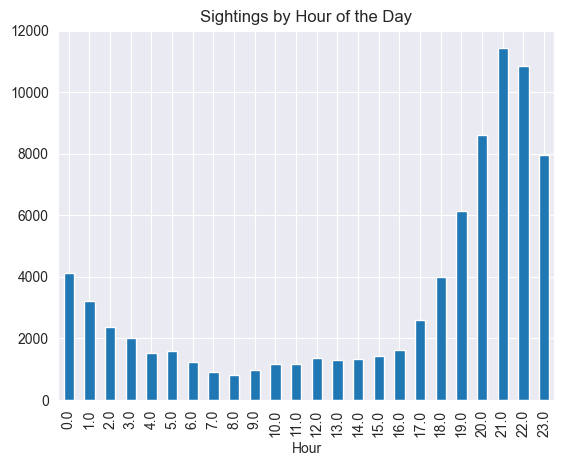

In [41]:
df["Hour"].value_counts().sort_index().plot(kind="bar", title="Sightings by Hour of the Day")
plt.savefig("../images/sightings_hourly.png", dpi=300)

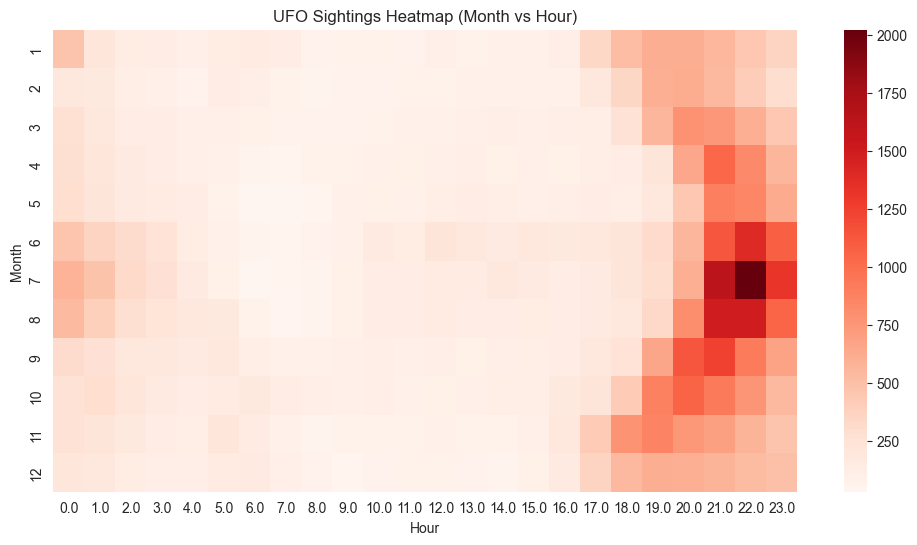

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot = df.pivot_table(index="Month", columns="Hour", values="City", aggfunc="count")
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap="Reds")
plt.title("UFO Sightings Heatmap (Month vs Hour)")
plt.xlabel("Hour")
plt.ylabel("Month")
plt.show()

### Time-Based Patterns in UFO Sightings

- Most sightings occur in **summer months**, peaking in July.
- Reports spike in the **evening hours**, especially between 8 PM and midnight.
- There is a noticeable increase in reports in the **late 1990s and early 2000s**, followed by a decline.
- Fridays and Saturdays see slightly more reports, hinting at potential reporting bias or leisure-time observation.